# <center>Model explainability with Lime on MNIST</center>

In [1]:
# The following two cells improve the formatting of the notebook

In [2]:
# Increase notebook cell width. Cell below increases the height.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

### General Libraries

In [4]:
#Libraries
import lime
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import kaggle # nb: must have api key stored in /home/dignachr8304/.kaggle/kaggle.json

### List of files

In [5]:
%%bash
ls -l data/

total 275712
-rw-rw-r-- 1 diggers8304 registered_users  22176691 Jul 31 17:38 fashion-mnist_test.csv
-rw-rw-r-- 1 diggers8304 registered_users 133047193 Jul 31 17:38 fashion-mnist_train.csv
-rw-rw-r-- 1 diggers8304 registered_users  72114606 Jul 31 17:38 fashionmnist.zip
-rw-rw-r-- 1 diggers8304 registered_users   7840016 Jul 31 17:38 t10k-images-idx3-ubyte
-rw-rw-r-- 1 diggers8304 registered_users     10008 Jul 31 17:38 t10k-labels-idx1-ubyte
-rw-rw-r-- 1 diggers8304 registered_users  47040016 Jul 31 17:38 train-images-idx3-ubyte
-rw-rw-r-- 1 diggers8304 registered_users     60008 Jul 31 17:38 train-labels-idx1-ubyte


### Import train data

In [6]:
df_train = pd.read_csv("data/fashion-mnist_train.csv")

In [7]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
df_train.shape

(60000, 785)

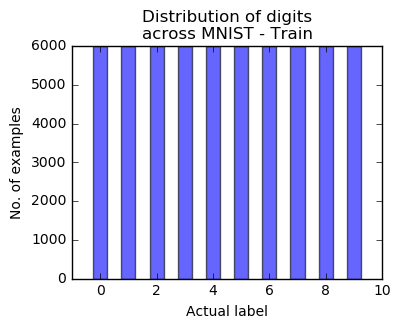

In [10]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(left=df_train["label"].value_counts().index,
       height=df_train["label"].value_counts().values,
      alpha=0.6,
      align="center",
      width=0.5)
ax.set_title("Distribution of digits\nacross MNIST - Train")
ax.set_xlim(-1, 10)
ax.set_xlabel("Actual label")
ax.set_ylabel("No. of examples")

### Transform train data for modeling

In [11]:
# Features
X = df_train.iloc[:, 1:].as_matrix()

In [12]:
# Target
y = df_train["label"].as_matrix()

### Fit the model

#### Algorithms

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(random_state=42)

In [15]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
# Evaluate training fit
clf.score(X, y)

0.99535

### OOB Testing

#### Import test data

In [18]:
df_test = pd.read_csv("data/fashion-mnist_test.csv")

In [19]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [21]:
df_test.shape

(10000, 785)

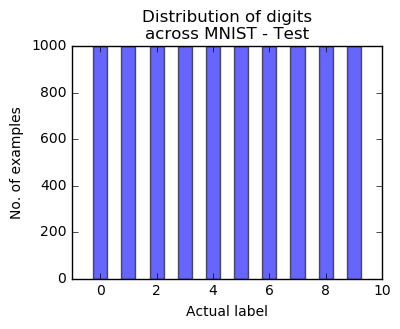

In [22]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(left=df_test["label"].value_counts().index,
       height=df_test["label"].value_counts().values,
      alpha=0.6,
      align="center",
      width=0.5)
ax.set_title("Distribution of digits\nacross MNIST - Test")
ax.set_xlim(-1, 10)
ax.set_xlabel("Actual label")
ax.set_ylabel("No. of examples")

### Transform test data for model evaluation

In [23]:
# Features
X_test = df_test.iloc[:, 1:].as_matrix()

### Generate predictions

In [24]:
predictions = clf.predict(X_test)

In [25]:
predictions

array([0, 1, 2, ..., 8, 8, 1])

In [26]:
# Write predictions back to test dataframe
df_test["predictions"] = predictions

In [27]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,predictions
0,0,0,0,0,0,0,0,0,9,8,...,87,56,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,63,53,31,0,0,0,2
3,2,0,0,0,0,0,0,0,0,0,...,126,140,0,133,224,222,56,0,0,6
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


### Evaluate predictions

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
y_true = df_test["label"]
y_pred = df_test["predictions"]

In [30]:
mean_test_acc = accuracy_score(y_true, y_pred)

In [31]:
print("The mean test accuracy is %.2f%%" % (mean_test_acc*100))

The mean test accuracy is 86.39%


Classification report:

In [32]:
clf_rpt_test = classification_report(y_true, y_pred)

In [33]:
print(clf_rpt_test)

             precision    recall  f1-score   support

          0       0.78      0.84      0.81      1000
          1       0.98      0.96      0.97      1000
          2       0.75      0.81      0.78      1000
          3       0.87      0.91      0.89      1000
          4       0.77      0.79      0.78      1000
          5       0.95      0.94      0.94      1000
          6       0.71      0.56      0.63      1000
          7       0.91      0.92      0.91      1000
          8       0.96      0.96      0.96      1000
          9       0.93      0.94      0.93      1000

avg / total       0.86      0.86      0.86     10000



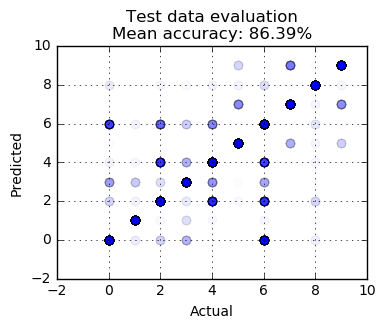

In [34]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(y_true, y_pred, alpha=0.01, s=40)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.grid()
ax.set_title("Test data evaluation\nMean accuracy: %.2f%%" % (mean_test_acc*100))

We can see from the classification report and visually from the above plot that the model has most trouble classifying 0, 2, 4 and 6 correctly.

0 and 6 are often confused.As are 2 and 6, and 4 and 6.

2 and 4 are also often confused.

If we can improve the overall classification of 6's (current F1 score is 0.63) then the overall model performance should improve greatly.

### Retrain the model with standardized features

The original values for each pixel are in the range [0, 255]. Let's experiment with some different transformations.

#### Binary transformation - training data

We need to set a cut-off level. Values above the cut-off will be transformed to 1, values below will be 0.

In [35]:
binary_cutoff = 150

In [36]:
from sklearn.preprocessing import Binarizer

In [37]:
binarizer = Binarizer(threshold=binary_cutoff)

In [38]:
X_train_bin = binarizer.transform(X)

In [39]:
X_train_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Refit the model with binarized features

In [40]:
clf.fit(X_train_bin, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
# Evaluate training fit
clf.score(X_train_bin, y)

0.9937666666666667

#### Transform the testing data with binarized features

In [42]:
# Features
X_test_bin = binarizer.transform(X_test)

In [43]:
X_test_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Generate predictions on binary transformed test data

In [44]:
predictions = clf.predict(X_test_bin)

In [45]:
predictions

array([0, 1, 2, ..., 8, 8, 6])

In [46]:
# Write predictions back to test dataframe
df_test["predictions_bin"] = predictions

In [47]:
y_true = df_test["label"]
y_pred = df_test["predictions_bin"]

In [48]:
mean_test_acc = accuracy_score(y_true, y_pred)

In [49]:
print("The mean test accuracy is %.2f%%" % (mean_test_acc*100))

The mean test accuracy is 78.52%


Oh dear...overall accuracy is worse!

In [50]:
clf_rpt_test = classification_report(y_true, y_pred)

In [51]:
print(clf_rpt_test)

             precision    recall  f1-score   support

          0       0.67      0.79      0.72      1000
          1       0.94      0.95      0.94      1000
          2       0.67      0.69      0.68      1000
          3       0.80      0.83      0.81      1000
          4       0.73      0.73      0.73      1000
          5       0.76      0.87      0.81      1000
          6       0.63      0.46      0.53      1000
          7       0.86      0.81      0.83      1000
          8       0.91      0.84      0.87      1000
          9       0.91      0.89      0.90      1000

avg / total       0.79      0.79      0.78     10000



So, looking like the binarization of features is a bad idea. Let's try a different normalization approach.

#### MinMaxScaler

We'll use this function to transform the features onto a scale of [0, 1].

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
min_max_scaler = MinMaxScaler() # default is to scale on [0, 1] range

In [54]:
X_train_minmax = min_max_scaler.fit_transform(X)

In [55]:
X_train_minmax

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Refit the model with minmax features

In [56]:
clf.fit(X_train_minmax, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [57]:
# Evaluate training fit
clf.score(X_train_minmax, y)

0.99535

Going to stop here as the training fit result is exactly the same as the original features. Makes sense since we've just performed a linear transformation onto a smaller scale.

#### Log transformation

Intuitively, this is worth trying. If the original value in range [0, 255] represents the intensity of the pixel, then an exponential transformation will accentuate high values, but demote lower values exponentially. Low values in the original data may be due to smudges or non-standard ways of writing a digit.

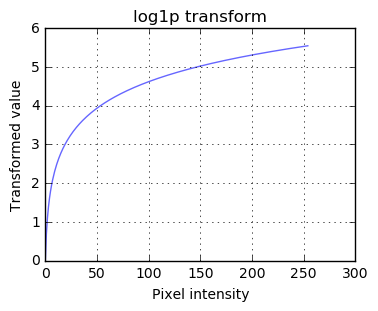

In [58]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(np.log1p(range(0, 255)), alpha=0.6)
ax.set_xlabel("Pixel intensity")
ax.set_ylabel("Transformed value")
ax.set_title("log1p transform")
ax.grid()

In [59]:
# We have to use a custom transformer to do the log transform
from sklearn.preprocessing import FunctionTransformer

In [60]:
transformer = FunctionTransformer(np.log1p)

In [61]:
X_train_log1p = transformer.transform(X)

In [62]:
X_train_log1p

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Refit the model with log transformed features

In [63]:
clf.fit(X_train_log1p, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [64]:
# Evaluate training fit
clf.score(X_train_log1p, y)

0.9955

This is a slight improvement in fit compared to the original model with raw features. Lets now try the OOB test...

#### Transform the testing data with log transformed features

In [65]:
X_test_log1p = transformer.transform(X_test)

In [66]:
X_test_log1p

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.69314718,
        0.        ],
       [0.        , 0.69314718, 1.38629436, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Generate predictions of log transformed data

In [67]:
predictions = clf.predict(X_test_log1p)

In [68]:
predictions

array([0, 1, 2, ..., 8, 8, 1])

In [69]:
# Write predictions back to test dataframe
df_test["predictions_log"] = predictions

In [70]:
y_true = df_test["label"]
y_pred = df_test["predictions_log"]

In [71]:
mean_test_acc = accuracy_score(y_true, y_pred)

In [72]:
print("The mean test accuracy is %.2f%%" % (mean_test_acc*100))

The mean test accuracy is 86.35%


In [73]:
clf_rpt_test = classification_report(y_true, y_pred)

In [74]:
print(clf_rpt_test)

             precision    recall  f1-score   support

          0       0.78      0.84      0.81      1000
          1       0.98      0.96      0.97      1000
          2       0.76      0.80      0.78      1000
          3       0.88      0.91      0.89      1000
          4       0.78      0.80      0.79      1000
          5       0.95      0.93      0.94      1000
          6       0.71      0.57      0.63      1000
          7       0.91      0.92      0.91      1000
          8       0.96      0.96      0.96      1000
          9       0.93      0.94      0.93      1000

avg / total       0.86      0.86      0.86     10000



Alas! No significant difference in the OOB test in this model compared to the original model with raw features :-(

### PCA

Let's change tack. The original dataset has 28 x 28 (784) features. Let's try reducing the dimensionality using PCA, then training a model on the most significant principal components.

In [95]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA(n_components=100)

In [97]:
pca.fit(X) # fit pca on the train data. Going forward, we only use transform, don't reift!

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [98]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29011353, 0.46739022, 0.52761721, 0.57731993, 0.61571282,
       0.65042278, 0.67386322, 0.6930026 , 0.70643865, 0.7195459 ,
       0.7294438 , 0.7385843 , 0.74623636, 0.75284063, 0.75893251,
       0.76484756, 0.77036802, 0.77567292, 0.7802725 , 0.78482785,
       0.78915608, 0.7932171 , 0.7970518 , 0.80079401, 0.80441277,
       0.80792187, 0.81125773, 0.81444469, 0.81754088, 0.82049366,
       0.82325374, 0.82590713, 0.82853675, 0.83111354, 0.83358914,
       0.83597327, 0.838274  , 0.84051748, 0.84270874, 0.84480611,
       0.84681396, 0.84878965, 0.85073176, 0.85256945, 0.8543272 ,
       0.85604264, 0.85772305, 0.85936225, 0.86098436, 0.86254454,
       0.86408405, 0.86559197, 0.86706813, 0.86849619, 0.86987948,
       0.87124917, 0.87255884, 0.87384837, 0.87511863, 0.87637884,
       0.87760627, 0.87881343, 0.87999241, 0.88115481, 0.88230695,
       0.88342574, 0.88453893, 0.88563222, 0.88668998, 0.88773608,
       0.88877453, 0.88979359, 0.89076572, 0.89171787, 0.89265

In [99]:
X_train_pca = pca.transform(X) # only transform, don't refit!

In [100]:
X_train_pca

array([[  940.01497881,  1264.93489861,   -13.06413306, ...,
           20.25475241,    43.50155705,    62.78497242],
       [-1115.99075998,   984.56996449,  -497.10540851, ...,
           25.31993586,    54.09057405,   -76.1898618 ],
       [ 1852.61374031,   400.03294731,   590.38581753, ...,
            8.57491294,   -32.25511786,   -16.28232157],
       ...,
       [  556.32082457,   115.2027118 ,  -141.89838448, ...,
          -29.14059633,   -15.28752573,   -75.40237609],
       [  374.86762603,  1546.1664527 ,  -159.31301362, ...,
          -88.34100259,    95.67526249,    16.25160777],
       [ -910.78171962,  1216.64229325,   -67.90464095, ...,
           10.2349662 ,   -52.37200102,   -44.88864187]])

#### Refit the model with PCA features

In [101]:
clf.fit(X_train_pca, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [102]:
# Evaluate training fit
clf.score(X_train_pca, y)

0.9959666666666667

Excellent! An improved mean accuracy vs the original model with raw features. Let's try the OOB sample...

#### Transform the testing data with pca features

In [103]:
X_test_pca = pca.transform(X_test) # transform only, don't refit!

In [104]:
X_test_pca

array([[ 1.39576122e+03, -3.68402277e+02, -1.72399000e+02, ...,
         7.64813916e+01,  4.25789044e+01,  3.27026381e+01],
       [-5.79312280e+01, -1.55385420e+03, -3.31116361e+02, ...,
        -1.40533265e+01,  1.90301244e+00,  1.76093224e+01],
       [-8.19925575e+02, -1.45828202e+02,  8.38772231e+02, ...,
         1.78601329e+01,  5.36651821e+01, -2.56750017e+01],
       ...,
       [ 2.75768933e+02,  9.93501252e+02,  4.84175865e+01, ...,
         1.04766859e+02, -7.30682657e+01, -1.19252705e+02],
       [ 1.56237646e+03,  1.32279080e+03, -3.36261129e+01, ...,
         9.24078633e+01,  1.30013573e+01,  1.26972304e+00],
       [ 1.95395445e+03,  1.26453734e+02,  3.62754332e+02, ...,
         7.52648874e+00, -9.46795668e+01,  4.76803018e+00]])

#### Generate predictions on pca transformed data

In [105]:
predictions = clf.predict(X_test_pca)

In [106]:
predictions

array([0, 1, 2, ..., 8, 0, 0])

In [107]:
# Write predictions back to test dataframe
df_test["predictions_pca"] = predictions

In [108]:
y_true = df_test["label"]
y_pred = df_test["predictions_pca"]

In [109]:
mean_test_acc = accuracy_score(y_true, y_pred)

In [110]:
print("The mean test accuracy is %.2f%%" % (mean_test_acc*100))

The mean test accuracy is 83.48%


In [111]:
clf_rpt_test = classification_report(y_true, y_pred)

In [112]:
print(clf_rpt_test)

             precision    recall  f1-score   support

          0       0.74      0.83      0.78      1000
          1       0.98      0.96      0.97      1000
          2       0.72      0.77      0.74      1000
          3       0.86      0.88      0.87      1000
          4       0.75      0.77      0.76      1000
          5       0.88      0.91      0.89      1000
          6       0.65      0.52      0.58      1000
          7       0.90      0.87      0.88      1000
          8       0.94      0.93      0.93      1000
          9       0.91      0.92      0.92      1000

avg / total       0.83      0.83      0.83     10000



**nbextensions**